# Setup

We will call required packages here

In [27]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Setup Input

In [3]:
# loading the Fashion-MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# trimming the data since it takes lot of time
X_train_full = X_train_full[:30000]
y_train_full = y_train_full[:30000]

X_test = X_test[:5000]
y_test = y_test[:5000]

# scaling the dataset
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# dividing the dataset into traingin and validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# scaling the dataset
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Optimisers

We will start look at different optimisers and compare them

## Stochastic Gradient Descent

In [4]:
#For all experiments
n_epochs=10
history={}

In [5]:
optimizer = keras.optimizers.SGD(lr=0.001) 

In [6]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [7]:
#training the model
history['sgd'] = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 3s 119us/sample - loss: 0.8651 - accuracy: 0.7047 - val_loss: 0.6259 - val_accuracy: 0.7864
Epoch 2/10
25000/25000 [==============================] - 3s 102us/sample - loss: 0.5845 - accuracy: 0.7975 - val_loss: 0.5428 - val_accuracy: 0.8132
Epoch 3/10
25000/25000 [==============================] - 3s 104us/sample - loss: 0.5231 - accuracy: 0.8184 - val_loss: 0.5081 - val_accuracy: 0.8248
Epoch 4/10
25000/25000 [==============================] - 3s 104us/sample - loss: 0.4899 - accuracy: 0.8290 - val_loss: 0.4855 - val_accuracy: 0.8332
Epoch 5/10
25000/25000 [==============================] - 3s 136us/sample - loss: 0.4671 - accuracy: 0.8371 - val_loss: 0.4704 - val_accuracy: 0.8386
Epoch 6/10
25000/25000 [==============================] - 3s 126us/sample - loss: 0.4498 - accuracy: 0.8417 - val_loss: 0.4594 - val_accuracy: 0.8402
Epoch 7/10
25000/25000 [===========================

## Momentum

In [8]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [9]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [10]:

#training the model
history['mag'] = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 3s 126us/sample - loss: 0.5586 - accuracy: 0.8025 - val_loss: 0.4398 - val_accuracy: 0.8496
Epoch 2/10
25000/25000 [==============================] - 3s 106us/sample - loss: 0.4157 - accuracy: 0.8509 - val_loss: 0.4115 - val_accuracy: 0.8624
Epoch 3/10
25000/25000 [==============================] - 3s 109us/sample - loss: 0.3748 - accuracy: 0.8661 - val_loss: 0.3948 - val_accuracy: 0.8674
Epoch 4/10
25000/25000 [==============================] - 3s 105us/sample - loss: 0.3484 - accuracy: 0.8758 - val_loss: 0.3907 - val_accuracy: 0.8646
Epoch 5/10
25000/25000 [==============================] - 3s 107us/sample - loss: 0.3275 - accuracy: 0.8837 - val_loss: 0.3842 - val_accuracy: 0.8652
Epoch 6/10
25000/25000 [==============================] - 3s 107us/sample - loss: 0.3107 - accuracy: 0.8881 - val_loss: 0.3803 - val_accuracy: 0.8644
Epoch 7/10
25000/25000 [===========================

## NAG (Nesterov)

In [11]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [12]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [13]:


#training the model
history['nag'] = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 3s 127us/sample - loss: 0.5491 - accuracy: 0.8056 - val_loss: 0.4325 - val_accuracy: 0.8492
Epoch 2/10
25000/25000 [==============================] - 3s 112us/sample - loss: 0.4107 - accuracy: 0.8524 - val_loss: 0.4022 - val_accuracy: 0.8692
Epoch 3/10
25000/25000 [==============================] - 3s 106us/sample - loss: 0.3695 - accuracy: 0.8678 - val_loss: 0.3920 - val_accuracy: 0.8696
Epoch 4/10
25000/25000 [==============================] - 3s 112us/sample - loss: 0.3424 - accuracy: 0.8775 - val_loss: 0.3869 - val_accuracy: 0.8692
Epoch 5/10
25000/25000 [==============================] - 3s 110us/sample - loss: 0.3219 - accuracy: 0.8867 - val_loss: 0.3817 - val_accuracy: 0.8686
Epoch 6/10
25000/25000 [==============================] - 3s 112us/sample - loss: 0.3049 - accuracy: 0.8898 - val_loss: 0.3780 - val_accuracy: 0.8680
Epoch 7/10
25000/25000 [===========================

## Adagrad

Adaptive gradients use the historic sums of squares of gradients to enable a variable degradation of learning rates

In [14]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

In [15]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [16]:


#training the model
history['adagrad'] = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 3s 124us/sample - loss: 0.6730 - accuracy: 0.7650 - val_loss: 0.5240 - val_accuracy: 0.8202
Epoch 2/10
25000/25000 [==============================] - 3s 107us/sample - loss: 0.4908 - accuracy: 0.8259 - val_loss: 0.4727 - val_accuracy: 0.8408
Epoch 3/10
25000/25000 [==============================] - 3s 108us/sample - loss: 0.4502 - accuracy: 0.8420 - val_loss: 0.4544 - val_accuracy: 0.8440
Epoch 4/10
25000/25000 [==============================] - 3s 108us/sample - loss: 0.4273 - accuracy: 0.8483 - val_loss: 0.4417 - val_accuracy: 0.8510
Epoch 5/10
25000/25000 [==============================] - 3s 108us/sample - loss: 0.4111 - accuracy: 0.8558 - val_loss: 0.4332 - val_accuracy: 0.8518
Epoch 6/10
25000/25000 [==============================] - 3s 110us/sample - loss: 0.3983 - accuracy: 0.8594 - val_loss: 0.4255 - val_accuracy: 0.8554
Epoch 7/10
25000/25000 [===========================

## RMSProp

RMSProp add uses the exponentially decaying sum of squares of gradients, differing from Adagrad

In [17]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [18]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [19]:


#training the model
history['rmsprop'] = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 192us/sample - loss: 0.6139 - accuracy: 0.7967 - val_loss: 0.6599 - val_accuracy: 0.7912
Epoch 2/10
25000/25000 [==============================] - 4s 160us/sample - loss: 0.4226 - accuracy: 0.8518 - val_loss: 0.5080 - val_accuracy: 0.8414
Epoch 3/10
25000/25000 [==============================] - 3s 135us/sample - loss: 0.3529 - accuracy: 0.8751 - val_loss: 0.4975 - val_accuracy: 0.8536
Epoch 4/10
25000/25000 [==============================] - 3s 132us/sample - loss: 0.3167 - accuracy: 0.8869 - val_loss: 0.4164 - val_accuracy: 0.8698
Epoch 5/10
25000/25000 [==============================] - 3s 134us/sample - loss: 0.2851 - accuracy: 0.8983 - val_loss: 0.4434 - val_accuracy: 0.8704
Epoch 6/10
25000/25000 [==============================] - 3s 132us/sample - loss: 0.2587 - accuracy: 0.9072 - val_loss: 0.5815 - val_accuracy: 0.8458
Epoch 7/10
25000/25000 [===========================

## Adam Optimization

Adam uses the best of momentum acceleration and RMSprop. This gives the momentum and also decays the learning rates.

In [20]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [21]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [22]:


#training the model
history['adam'] = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 4s 161us/sample - loss: 0.5549 - accuracy: 0.8082 - val_loss: 0.4655 - val_accuracy: 0.8410
Epoch 2/10
25000/25000 [==============================] - 3s 105us/sample - loss: 0.4034 - accuracy: 0.8552 - val_loss: 0.4053 - val_accuracy: 0.8624
Epoch 3/10
25000/25000 [==============================] - 3s 106us/sample - loss: 0.3392 - accuracy: 0.8741 - val_loss: 0.3956 - val_accuracy: 0.8658
Epoch 4/10
25000/25000 [==============================] - 3s 106us/sample - loss: 0.3016 - accuracy: 0.8867 - val_loss: 0.3725 - val_accuracy: 0.8684
Epoch 5/10
25000/25000 [==============================] - 3s 108us/sample - loss: 0.2710 - accuracy: 0.8995 - val_loss: 0.4243 - val_accuracy: 0.8580
Epoch 6/10
25000/25000 [==============================] - 3s 109us/sample - loss: 0.2547 - accuracy: 0.9063 - val_loss: 0.3715 - val_accuracy: 0.8816
Epoch 7/10
25000/25000 [===========================

## Nadam Optimiser

Nadam is Adam with Nesterov

In [23]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [24]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [25]:


#training the model
history['nadam'] = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 4s 173us/sample - loss: 0.5461 - accuracy: 0.8111 - val_loss: 0.5569 - val_accuracy: 0.8150
Epoch 2/10
25000/25000 [==============================] - 3s 140us/sample - loss: 0.3805 - accuracy: 0.8615 - val_loss: 0.4151 - val_accuracy: 0.8558
Epoch 3/10
25000/25000 [==============================] - 3s 136us/sample - loss: 0.3259 - accuracy: 0.8797 - val_loss: 0.4179 - val_accuracy: 0.8608
Epoch 4/10
25000/25000 [==============================] - 3s 139us/sample - loss: 0.2884 - accuracy: 0.8916 - val_loss: 0.4318 - val_accuracy: 0.8548
Epoch 5/10
25000/25000 [==============================] - 4s 140us/sample - loss: 0.2601 - accuracy: 0.9010 - val_loss: 0.4165 - val_accuracy: 0.8670
Epoch 6/10
25000/25000 [==============================] - 4s 141us/sample - loss: 0.2363 - accuracy: 0.9132 - val_loss: 0.4264 - val_accuracy: 0.8664
Epoch 7/10
25000/25000 [===========================

# Visualization

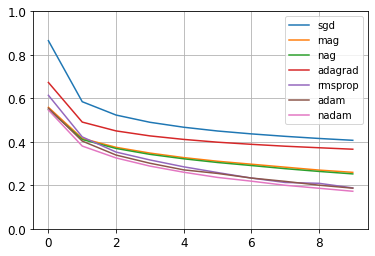

In [39]:




for opt in ['sgd', 'mag', 'nag', 'adagrad', 'rmsprop', 'adam', 'nadam']:
    plt.plot(history[opt].history['loss'], label=opt)

plt.legend()
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()